In [1]:
import torch 
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

# Dataset & DataLoader 
- torch.utils.data.Dataset : torch에서 dataset 제공하기위한 abstract class
  * torchvision / torchtext / torchaudio

  - root : data 저장경로
  - train : train data 여부
  - download : data가 root에 없으면 download
  - transform : feature, label transform 지정

In [3]:
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [25]:
# MNIST dataset
training_data = datasets.MNIST(root='MNIST_data/',
                          train=True,
                          transform=transforms.ToTensor(),
                          download=True)

test_data = datasets.MNIST(root='MNIST_data/',
                         train=False,
                         transform=transforms.ToTensor(),
                         download=True)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting MNIST_data/MNIST/raw/train-images-idx3-ubyte.gz to MNIST_data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting MNIST_data/MNIST/raw/train-labels-idx1-ubyte.gz to MNIST_data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting MNIST_data/MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST_data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting MNIST_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST_data/MNIST/raw



In [50]:
#The output of torchvision datasets are PILImage images of range [0, 1]. We transform them to Tensors of normalized range [-1, 1].
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

# MNIST Dataset
training_data = datasets.MNIST(root='./mnist_data/', train=True, transform=transform, download=True)
test_data = datasets.MNIST(root='./mnist_data/', train=False, transform=transform)

# Data Loader 
train_loader = torch.utils.data.DataLoader(dataset=training_data, batch_size=32, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_data, batch_size=32, shuffle=False)


In [64]:
# download and transform train dataset
train_dataloader = torch.utils.data.DataLoader(datasets.MNIST('../mnist_data', 
                                                          download=True, 
                                                          train=True,
                                                          transform=transforms.Compose([
                                                              transforms.ToTensor(), # first, convert image to PyTorch tensor
                                                              transforms.Normalize((0.1307,), (0.3081,)) # normalize inputs
                                                          ])), 
                                           batch_size=64, 
                                           shuffle=True)

# download and transform test dataset
test_dataloader = torch.utils.data.DataLoader(datasets.MNIST('../mnist_data', 
                                                          download=True, 
                                                          train=False,
                                                          transform=transforms.Compose([
                                                              transforms.ToTensor(), # first, convert image to PyTorch tensor
                                                              transforms.Normalize((0.1307,), (0.3081,)) # normalize inputs
                                                          ])), 
                                           batch_size=64, 
                                           shuffle=True)

In [55]:
#training_data.reshape([-1, 28, 28])/255
training_data

Dataset MNIST
    Number of datapoints: 60000
    Root location: MNIST_data/
    Split: Train
    StandardTransform
Transform: ToTensor()

- index로 dataset에 접근 가능

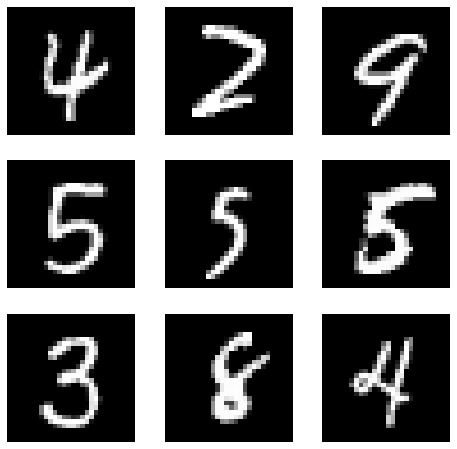

In [57]:
figure = plt.figure(figsize=(8,8))
cols, rows = 3, 3
for i in range(1, cols*rows+1):
  sample_idx = torch.randint(len(training_data), size=(1,)).item()
  img, label = training_data[sample_idx]
  figure.add_subplot(rows, cols, i)
  plt.axis('off')
  plt.imshow(img.squeeze(), cmap='gray')
plt.show()

- dataset class 상속하고 3개 메소드 override해서 custom dataset 만들 수 있음 
  * __init__(self) : data preprocessing
  * __len__(self) : data length
  * __getitem__(self, idx) : data 중에서 특정 idx 데이터 가져오는 함수

In [42]:
class CustomDataset(Dataset):
  def __init__(self, path, transform=None):
    self.x_data = [[73, 80, 75], [93, 88, 93], [89, 91, 90], [96, 98, 100], [73, 66, 70]]
    self.y_data = [[152], [185], [180], [196], [142]]

  def __len__(self):
    return len(self.x_data)

  def __getitem__(self, idx):
    x = torch.FloatTensor(self.x_data[idx])
    y = torch.FloatTensor(self.y_data[idx])
    return x, y

- transform : deep learning은 일반적으로 dimension이 같은 Input을 가정, data가 preprocessing 안되어있는 경우 feature, label을 preprocessing 해줘야 함

In [28]:
import torch
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda

In [58]:
ds = datasets.FashionMNIST(
    root='data',
    train=True,
    download=True,
    transform=ToTensor(),
    target_transform = Lambda(lambda y: torch.zeros(10, dtype=torch.float).scatter_(0,
                                                                                    torch.tensor(y), value=1))
)

print(ds[0][0].shape)
print(ds[0][1])

torch.Size([1, 28, 28])
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.])


- transforms.Compose : transforms의 여러 함수를 묶어주는 함수 
- transforms.Resize: image resize / transforms.RandomCrop: Image 랜덤하게 사이즈만큼 자름
- transoforms.ColorJitter : image의 컬러를 바꿈 
- transforms.RandomhorizontalFlip : 수평으로 랜덤하게 뒤집음

In [30]:
from skimage import io, transform
import torchvision.transforms as transforms

In [59]:
torchvision_transform = transforms.Compose([
     transforms.Resize((300, 300)),
     transforms.RandomCrop(224),
     transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.2),
     transforms.RandomHorizontalFlip(p=1),
     transforms.ToTensor()
])

torchvision_dataset = CustomDataset(
    path='images/',
    transform = torchvision_transform
)

- torch.utils.data.DataLoader: Dataset sample에 접근하도록 iterable object 제공, Minibatch 학습 쉽게, data sampler

In [45]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

Feature batch shape: torch.Size([10, 1, 28, 28])
Labels batch shape: torch.Size([10])


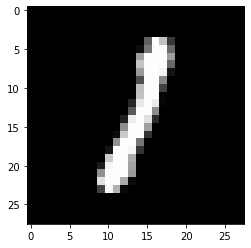

Label: 1


In [60]:
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap = 'gray')
plt.show()
print(f"Label: {label}")

# Training & Test example

In [61]:
import torch
import torch.nn.functional as F

class MLP(torch.nn.Module):
  def __init__(self):
    super(MLP, self).__init__()
    self.linear_relu_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(28*28, 512),
        nn.BatchNorm1d(512),
        nn.ReLU(),
        nn.Linear(512, 512),
        nn.BatchNorm1d(512),
        nn.ReLU(),
        nn.Linear(512, 10),
    )

  def forward(self, x):
    logits = self.linear_relu_stack(x)
    return logits

In [47]:
import torch.nn as nn

In [62]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
lr = 0.001
epochs=20
model = MLP().to(device)
criterion = torch.nn.CrossEntropyLoss().to(device)
optimizer = torch.optim.SGD(model.parameters(), lr=lr)

In [65]:
for epoch in range(epochs):
  for batch_idx, (X_train, y_train) in enumerate(train_dataloader):
    ### train ####
    model.train()
    optimizer.zero_grad()
    X_train = X_train.to(device)
    y_train = y_train.to(device)
    pred = model(X_train)
    loss = criterion(pred, y_train)
    loss.backward()
    optimizer.step()
    if batch_idx % 100 == 0:
      loss, current = loss.item(), batch_idx * len(X_train)
      print(f"loss: {loss:>7f} [{current:>5d}/{len(train_dataloader.dataset):>5d}]")
  test_loss, correct = 0, 0
  model.eval()
  with torch.no_grad():
    for X_test, y_test in test_dataloader:
      X_test = X_test.to(device)
      y_test = y_test.to(device)
      pred = model(X_test)
      test_loss += criterion(pred, y_test).item()
      correct += (pred.argmax(1) == y_test).type(torch.float).sum().item()
    test_loss /= len(test_dataloader)
    correct /= len(test_dataloader.dataset)
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

loss: 0.043071 [    0/60000]
loss: 0.099390 [ 6400/60000]
loss: 0.027373 [12800/60000]
loss: 0.058024 [19200/60000]
loss: 0.023799 [25600/60000]
loss: 0.083346 [32000/60000]
loss: 0.028186 [38400/60000]
loss: 0.107927 [44800/60000]
loss: 0.079702 [51200/60000]
loss: 0.054409 [57600/60000]
Test Error: 
 Accuracy: 97.9%, Avg loss: 0.073551 

loss: 0.037272 [    0/60000]
loss: 0.018732 [ 6400/60000]
loss: 0.039114 [12800/60000]
loss: 0.033210 [19200/60000]
loss: 0.064135 [25600/60000]
loss: 0.030639 [32000/60000]
loss: 0.133594 [38400/60000]
loss: 0.059920 [44800/60000]
loss: 0.015821 [51200/60000]
loss: 0.024961 [57600/60000]
Test Error: 
 Accuracy: 97.9%, Avg loss: 0.072540 

loss: 0.101741 [    0/60000]
loss: 0.052088 [ 6400/60000]
loss: 0.043955 [12800/60000]
loss: 0.020945 [19200/60000]
loss: 0.043287 [25600/60000]
loss: 0.022303 [32000/60000]
loss: 0.035188 [38400/60000]
loss: 0.027006 [44800/60000]
loss: 0.099601 [51200/60000]
loss: 0.043975 [57600/60000]
Test Error: 
 Accuracy: 98

# Model Save & Load

In [19]:
import torchvision.models as models
torch.save(model.state_dict(), 'model_weights.pth')

In [20]:
model.load_state_dict(torch.load('model_weights.pth'))
model.eval()

MLP(
  (linear_relu_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=512, bias=True)
    (2): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=512, bias=True)
    (5): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU()
    (7): Linear(in_features=512, out_features=10, bias=True)
  )
)

In [21]:
with torch.no_grad():
  for X_test, y_test in test_dataloader:
    X_test = X_test.to(device)
    y_test = y_test.to(device)
    pred = model(X_test)
    test_loss += criterion(pred, y_test).item()
    correct += (pred.argmax(1) == y_test).type(torch.float).sum().item()
    test_loss /= len(test_dataloader)
    correct /= len(test_dataloader)
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f}\n]")

Test Error: 
 Accuracy: 37.5%, Avg loss: 0.004191
]
Test Error: 
 Accuracy: 36.5%, Avg loss: 0.002071
]
Test Error: 
 Accuracy: 35.9%, Avg loss: 0.002125
]
Test Error: 
 Accuracy: 38.4%, Avg loss: 0.001755
]
Test Error: 
 Accuracy: 38.5%, Avg loss: 0.001073
]
Test Error: 
 Accuracy: 35.9%, Avg loss: 0.001743
]
Test Error: 
 Accuracy: 36.5%, Avg loss: 0.002489
]
Test Error: 
 Accuracy: 34.0%, Avg loss: 0.003043
]
Test Error: 
 Accuracy: 38.4%, Avg loss: 0.001239
]
Test Error: 
 Accuracy: 37.2%, Avg loss: 0.001628
]
Test Error: 
 Accuracy: 35.3%, Avg loss: 0.002492
]
Test Error: 
 Accuracy: 32.7%, Avg loss: 0.002890
]
Test Error: 
 Accuracy: 36.5%, Avg loss: 0.002479
]
Test Error: 
 Accuracy: 34.6%, Avg loss: 0.002790
]
Test Error: 
 Accuracy: 35.9%, Avg loss: 0.002164
]
Test Error: 
 Accuracy: 37.8%, Avg loss: 0.002017
]
Test Error: 
 Accuracy: 34.0%, Avg loss: 0.002151
]
Test Error: 
 Accuracy: 34.6%, Avg loss: 0.002570
]
Test Error: 
 Accuracy: 37.2%, Avg loss: 0.002202
]
Test Error: 